In [1]:
import sys
import os
import pandas as pd

# Lấy đường dẫn thư mục hiện tại
project_root = os.path.abspath('..')
src_path = os.path.join(project_root, 'src')
charts_dir = os.path.join(project_root, 'charts')
os.makedirs(charts_dir, exist_ok=True)

if src_path not in sys.path:
    sys.path.append(src_path)

# Tự động load lại code nếu bạn có sửa file .py trong src 
%reload_ext autoreload
%autoreload 2

# Import hàm từ file .py trong thư mục src
from calculate_average_score import calculate_average_score, visualize_average_score_ranking
from calculate_average_score import create_ranking_journey_table, visualize_ranking_journey, clean_rank_to_int

danh_sach_nam = range(2019, 2025)
target_year = 2024
top_n = 10

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2019...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2019_chart.png
Hoàn thành biểu đồ xếp hạng năm 2019.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2020...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2020_chart.png
Hoàn thành biểu đồ xếp hạng năm 2020.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2021...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2021_chart.png
Hoàn thành biểu đồ xếp hạng năm 2021.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2022...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2022_chart.png
Hoàn thành biểu đồ xếp hạng năm 2022.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2023...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2023_chart.png
Hoàn thành biểu đồ xếp hạng năm 2023.

📊 Bắt đầu 

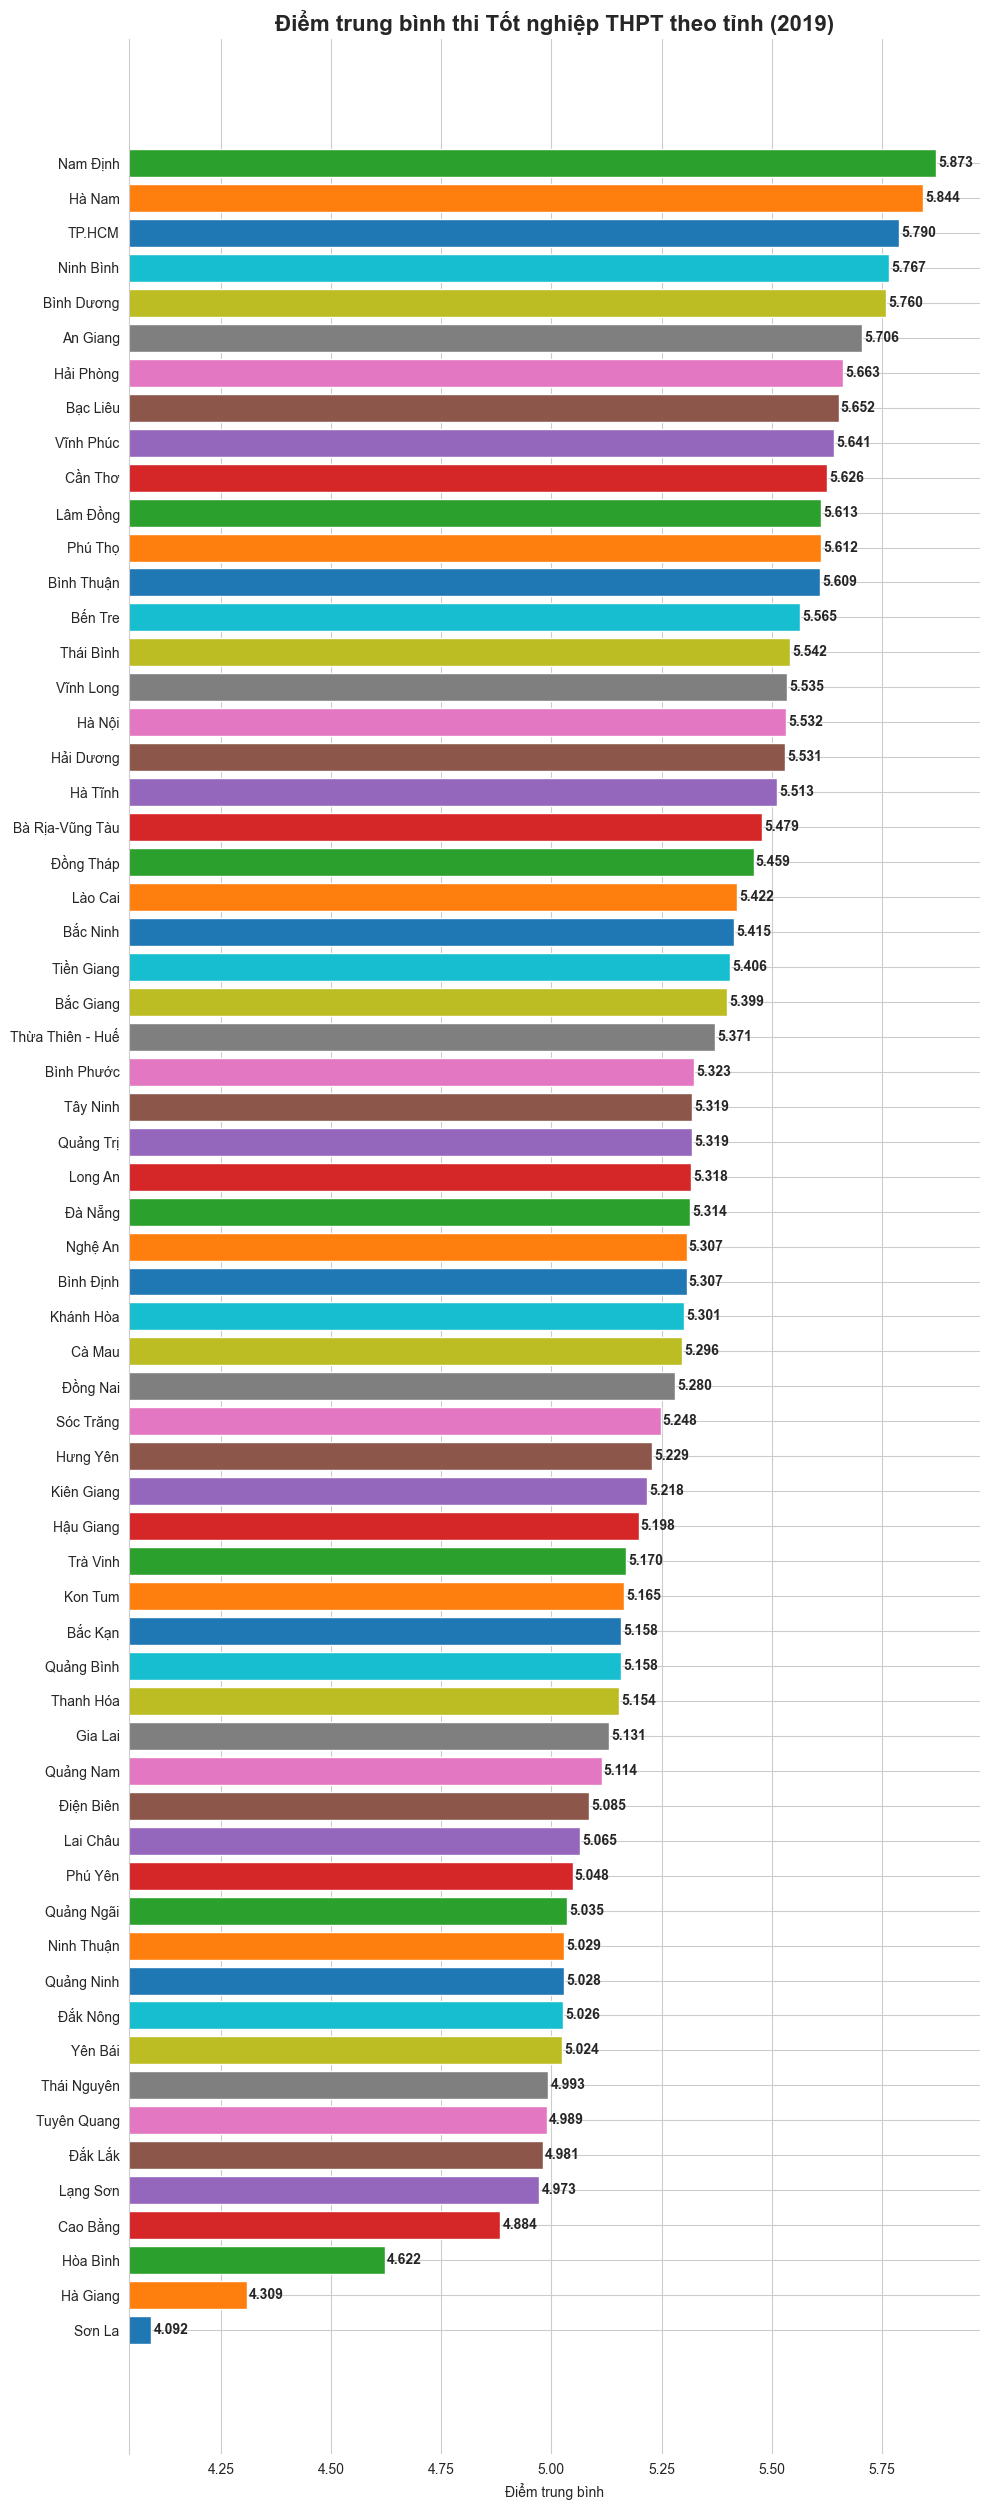

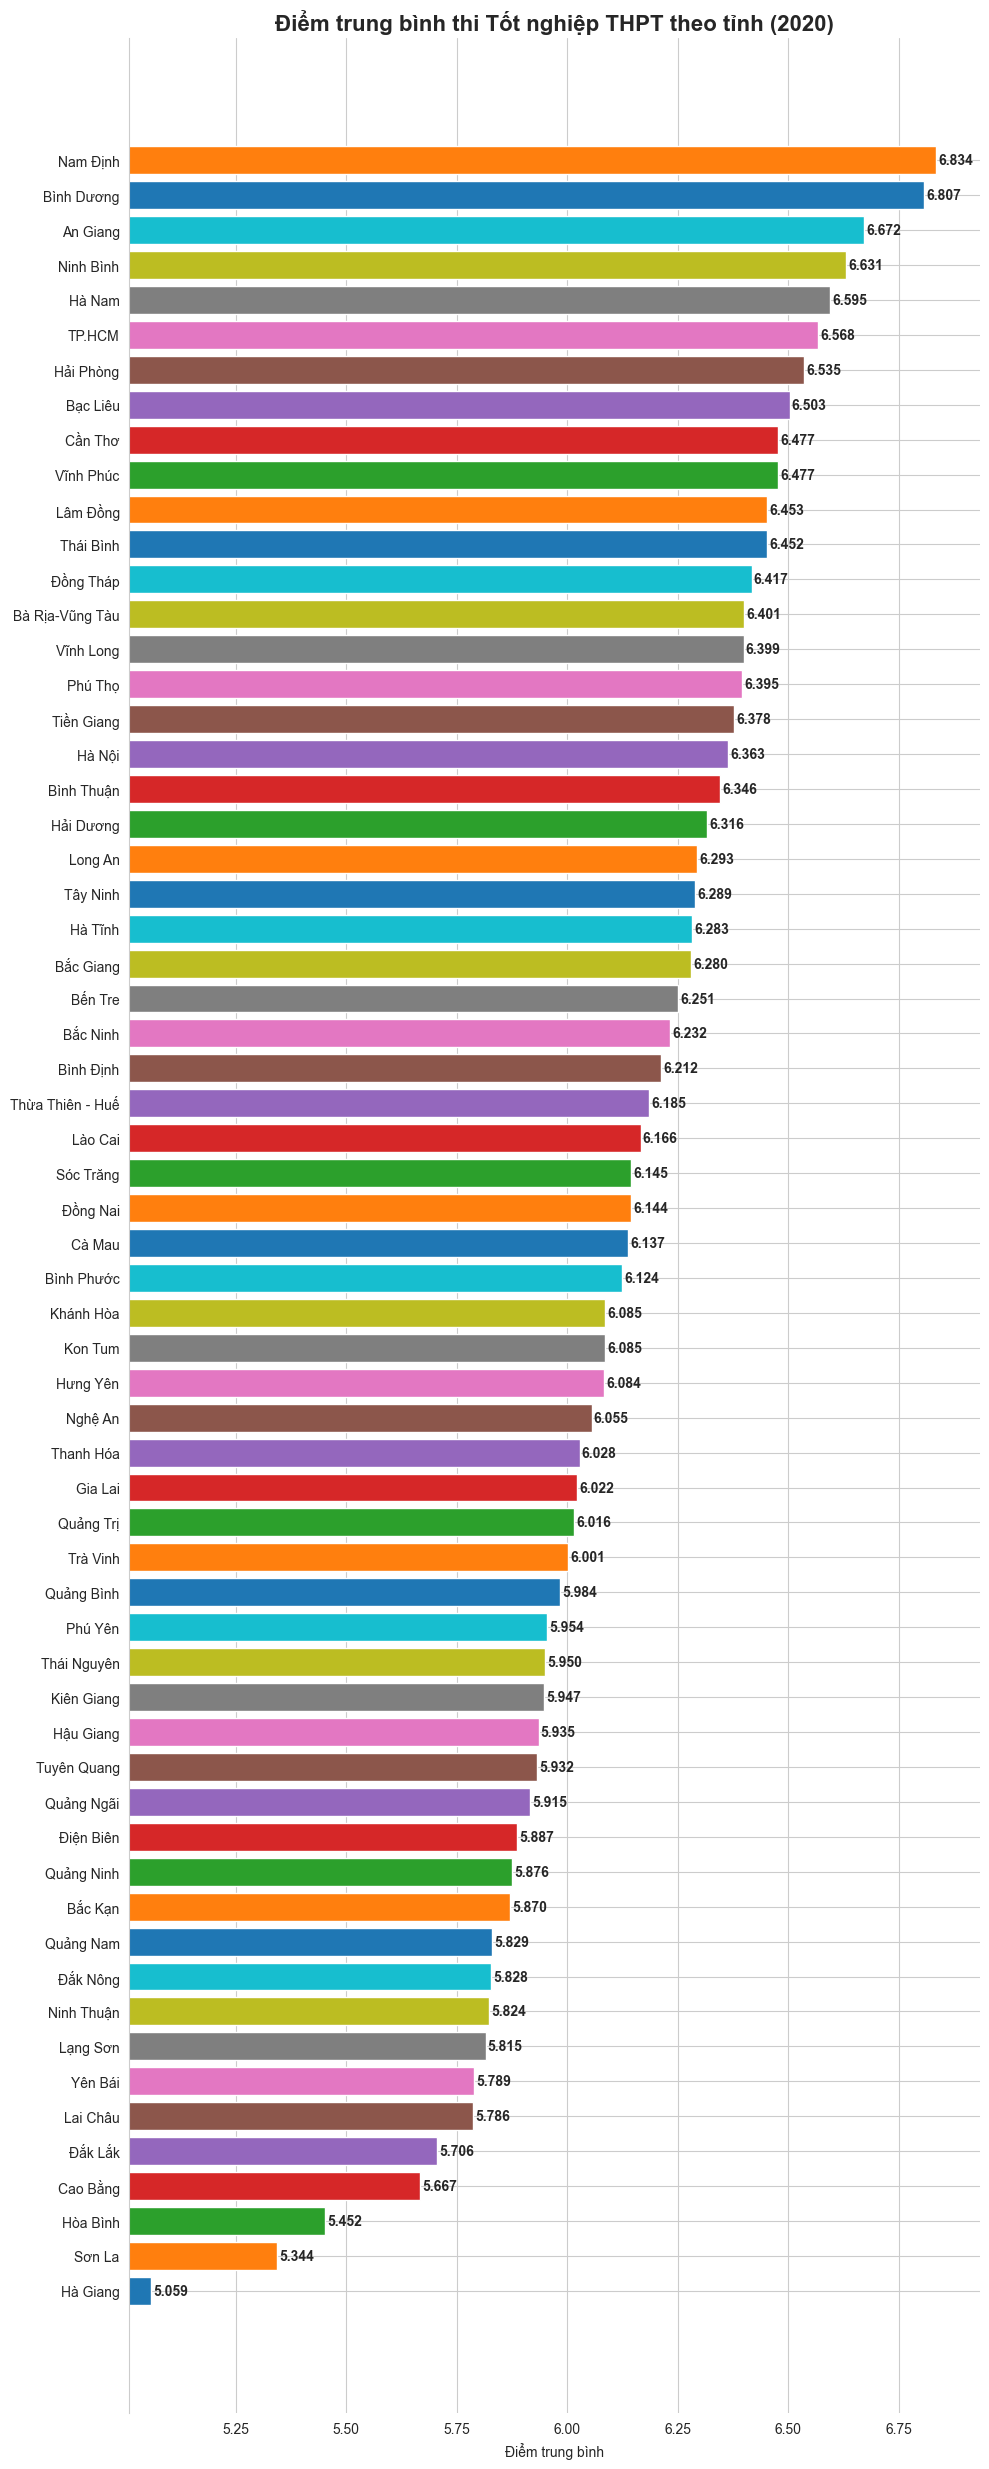

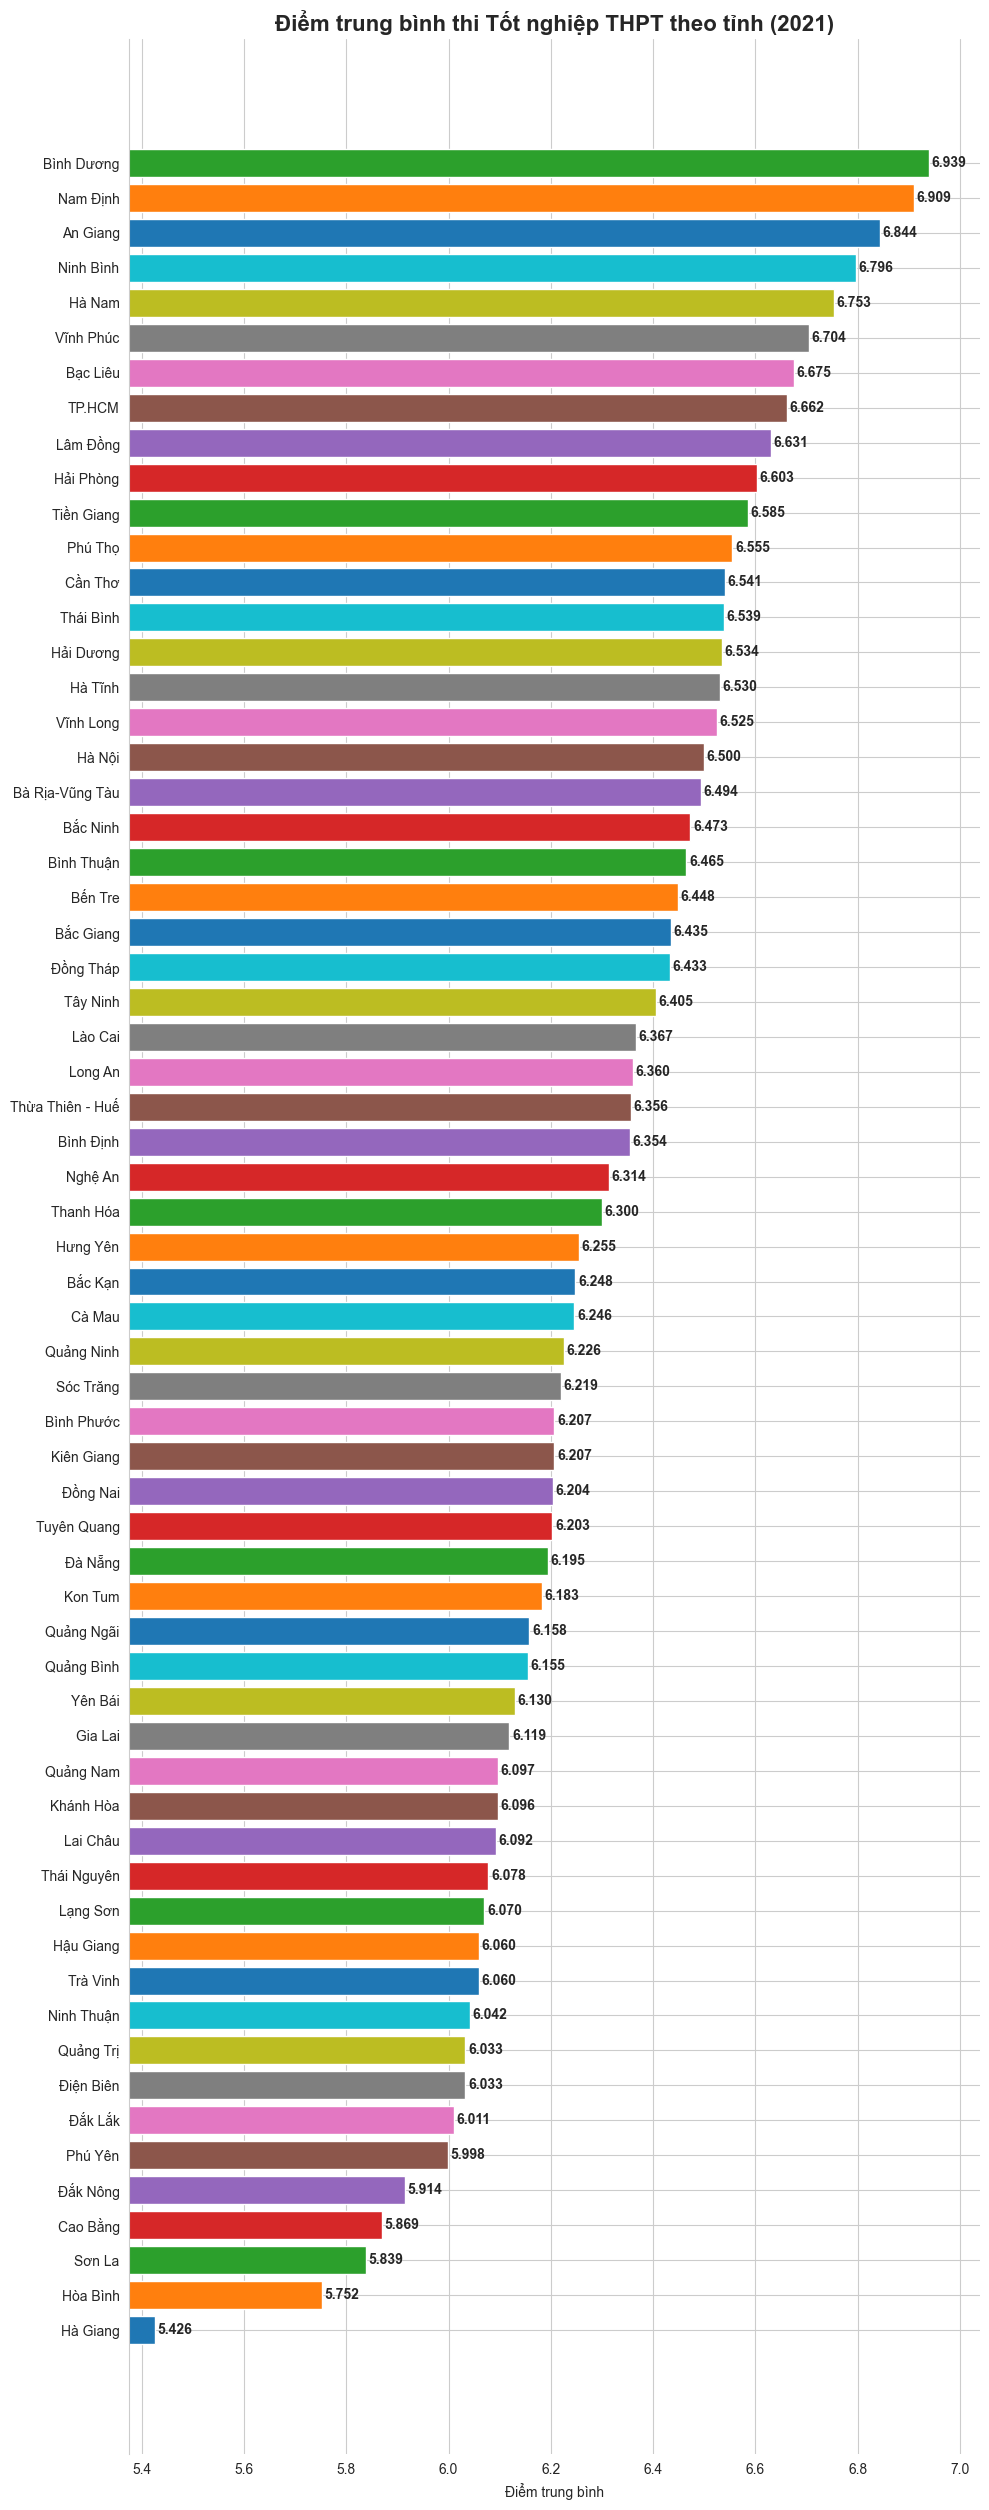

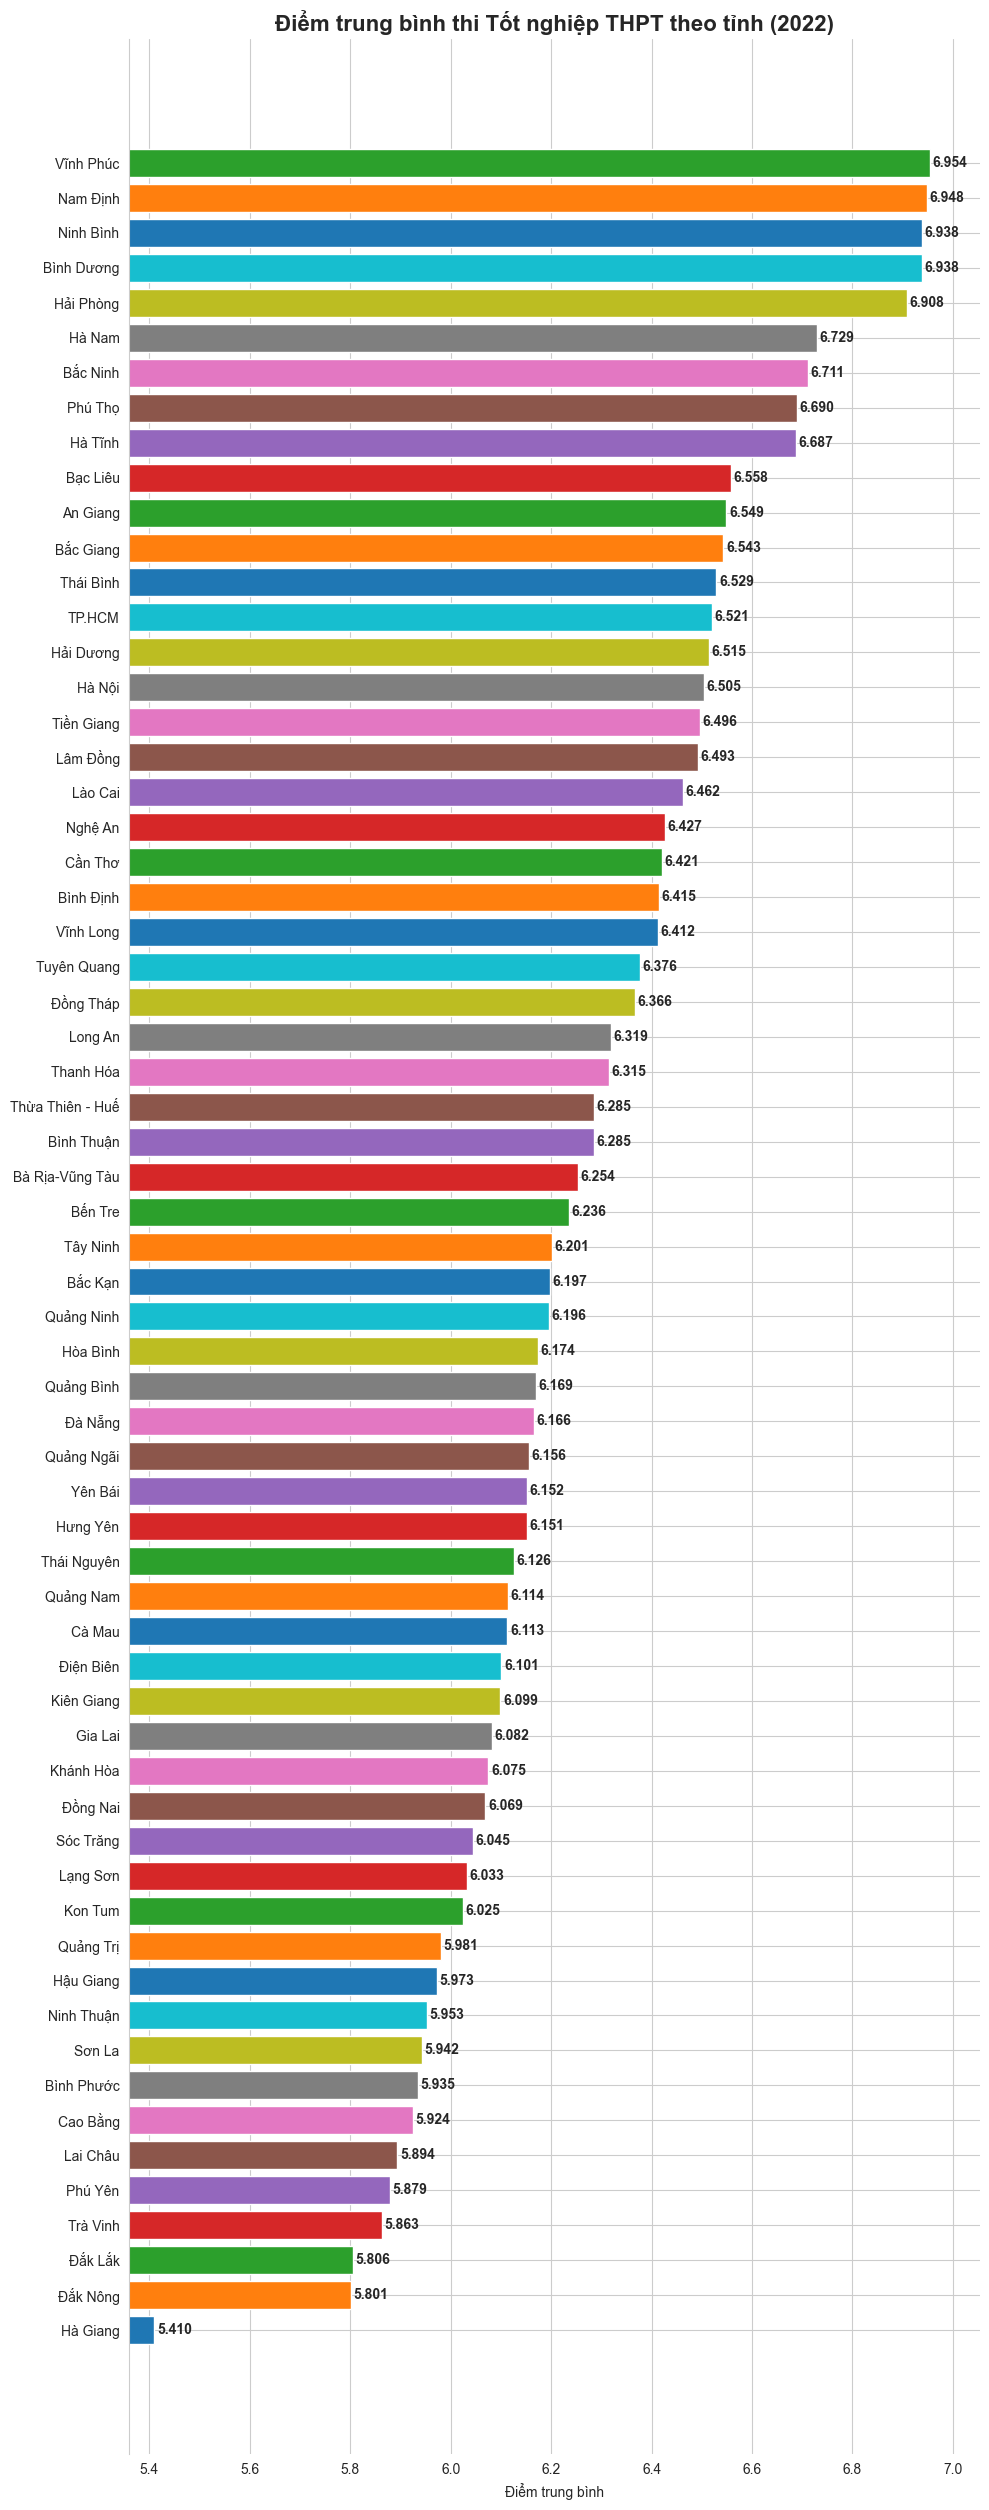

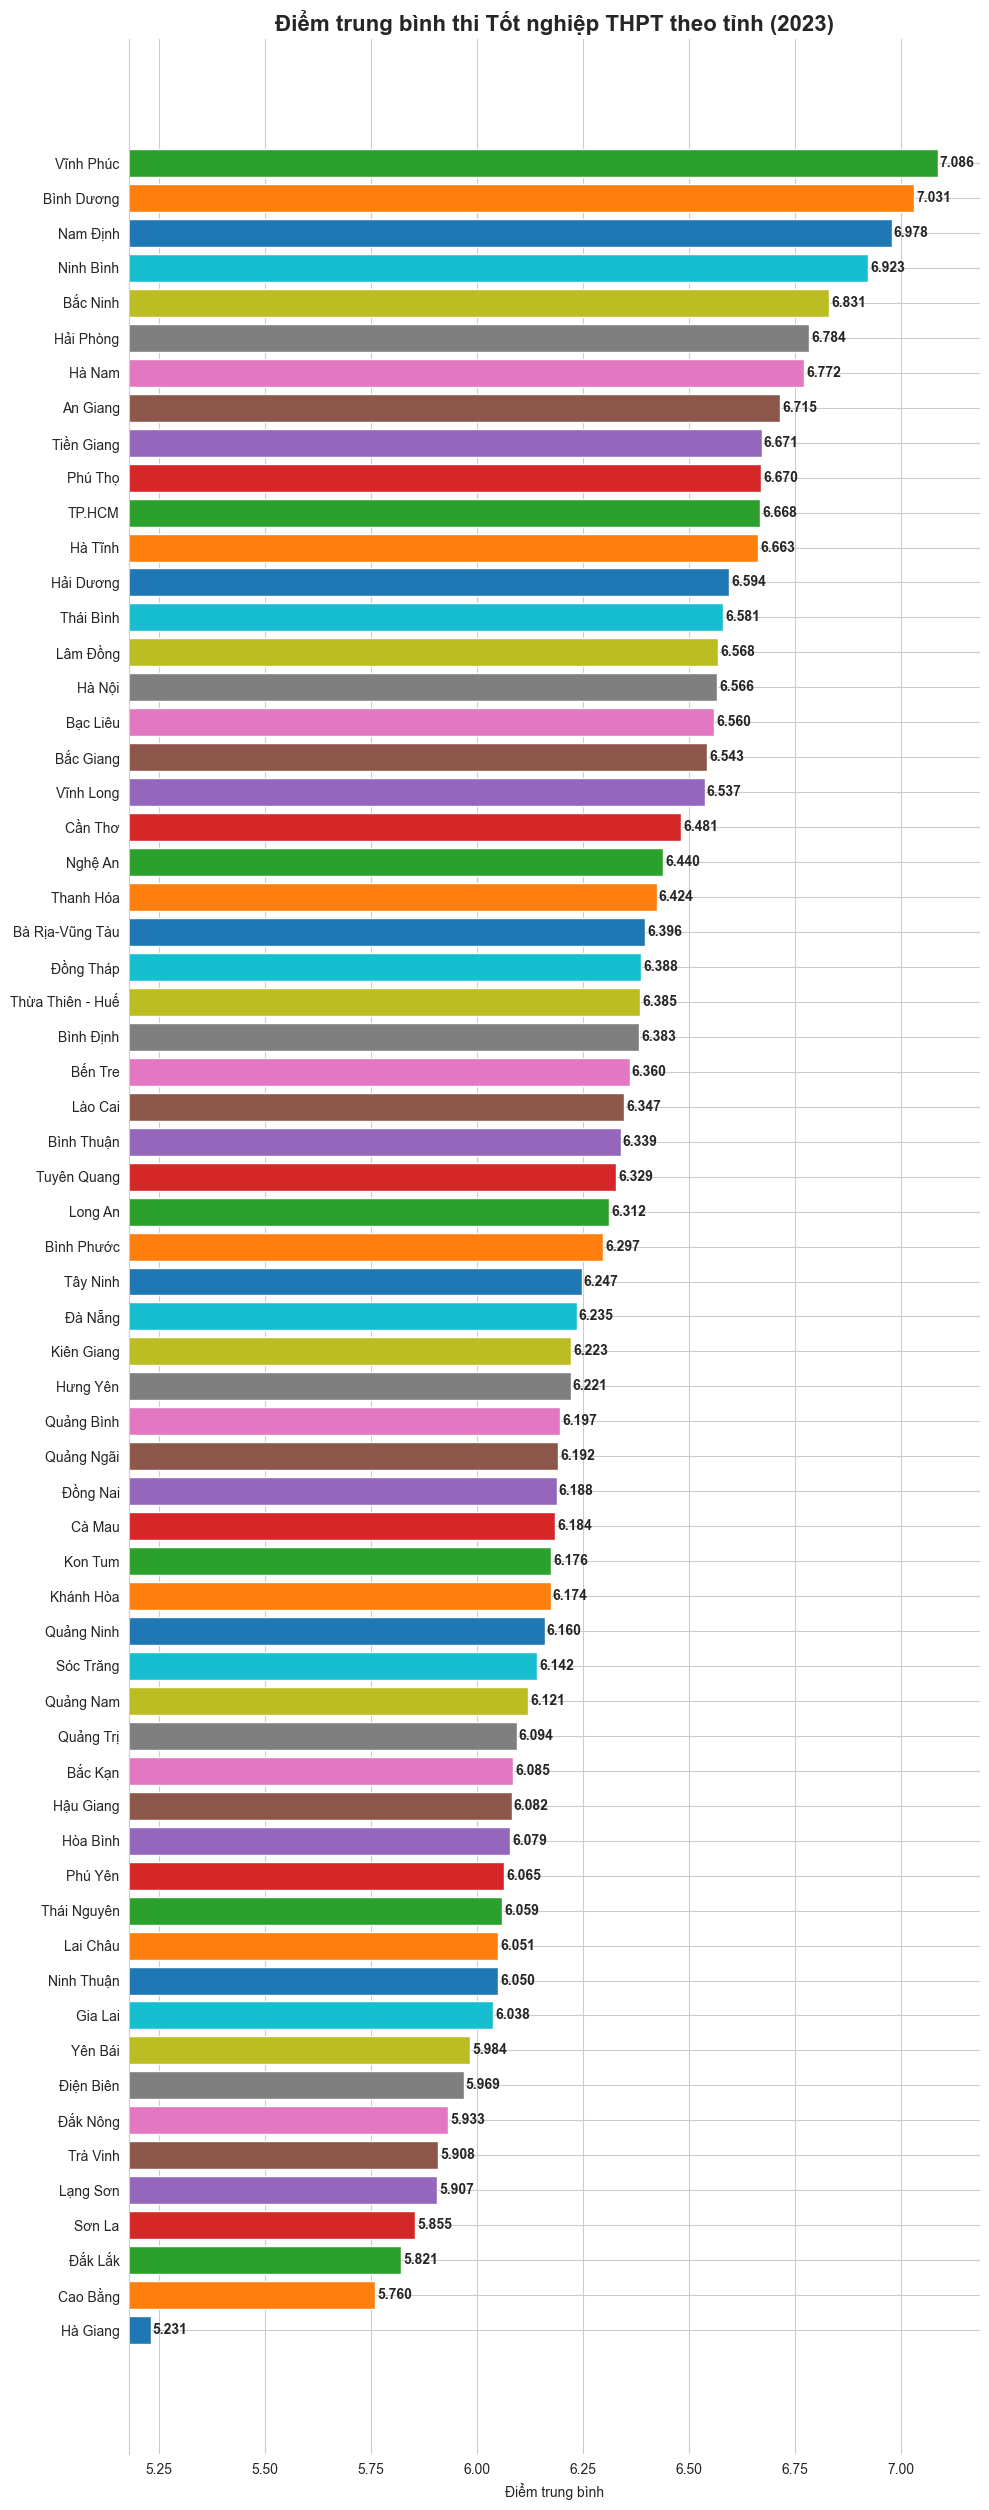

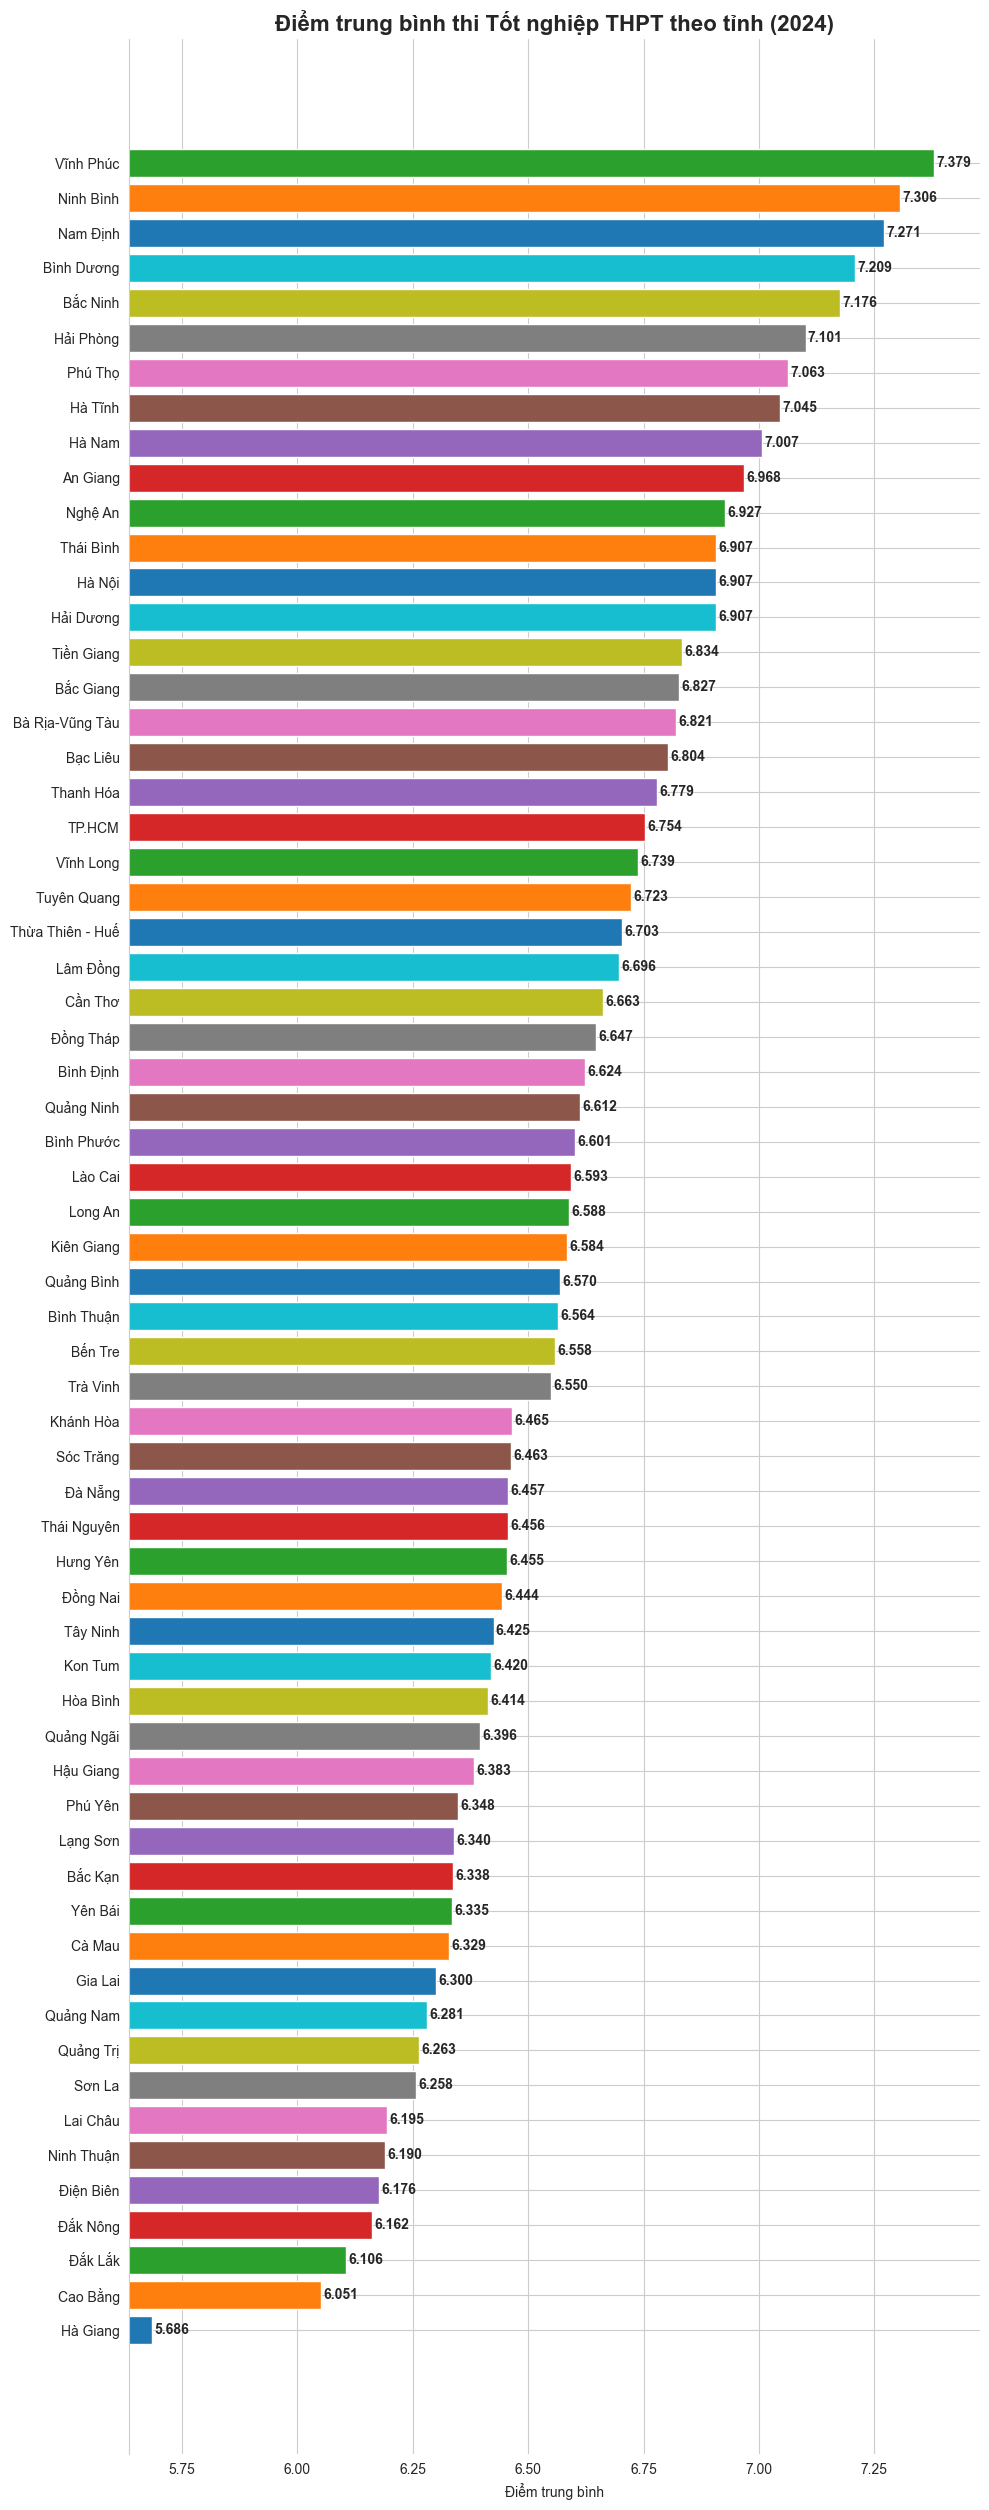

In [2]:
# --- VÒNG LẶP TÍNH TOÁN VÀ VISUALIZATION XẾP HẠNG TỪNG NĂM (63 TỈNH) ---
for nam in danh_sach_nam:
    # Tạo đường dẫn trỏ sang thư mục data
    path_csv = os.path.join(project_root, 'data', f'diem_thi_toan_quoc_{nam}.csv')
    path_json = os.path.join(project_root, 'data', 'ma_tinh.json')
    path_res_csv = os.path.join(project_root, 'data',f'diem_trung_binh_{nam}.csv' )
    path_res_png = os.path.join(charts_dir, f'ranking_{nam}_chart.png' )

    if os.path.exists(path_csv):
        
        # 1. TÍNH TOÁN 
        if not os.path.exists(path_res_csv):
            print(f"⏳ Tính toán Điểm TB năm {nam}...")
            # calculate_average_score(nam_thi=nam, file_input=path_csv, file_output = path_res_csv, file_tinh=path_json)
        
        # 2. GỌI HÀM VISUALIZATION (Vẽ biểu đồ xếp hạng từng năm)
        if os.path.exists(path_res_csv):
            print(f"📊 Bắt đầu tạo biểu đồ xếp hạng cho năm {nam}...")
            visualize_average_score_ranking(
                file_input_csv=path_res_csv, 
                nam_thi=nam, 
                file_output_png=path_res_png
            )
            print(f"Hoàn thành biểu đồ xếp hạng năm {nam}.\n")
        else:
            print(f"⚠️ Không thể tạo biểu đồ năm {nam} vì thiếu file CSV đã tính toán.")
            
    else:
        print(f"⚠️ Không tìm thấy file dữ liệu gốc năm {nam} tại: {path_csv}")

print("✅ Hoàn tất Visualization Xếp hạng Từng năm (63 tỉnh).")

--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---


,Tỉnh/Thành phố,Thứ hạng 2019,Thứ hạng 2020,Thứ hạng 2021,Thứ hạng 2022,Thứ hạng 2023,Thứ hạng 2024
0,Vĩnh Phúc,9,10,6,1,1,1
1,Ninh Bình,4,4,4,3,4,2
2,Nam Định,1,1,2,2,3,3
3,Bình Dương,5,2,1,4,2,4
4,Bắc Ninh,23,26,20,7,5,5
5,Hải Phòng,7,7,10,5,6,6
6,Phú Thọ,12,16,12,8,10,7
7,Hà Tĩnh,19,23,16,9,12,8
8,Hà Nam,2,5,5,6,7,9
9,An Giang,6,3,3,11,8,10


📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_best_journey.png


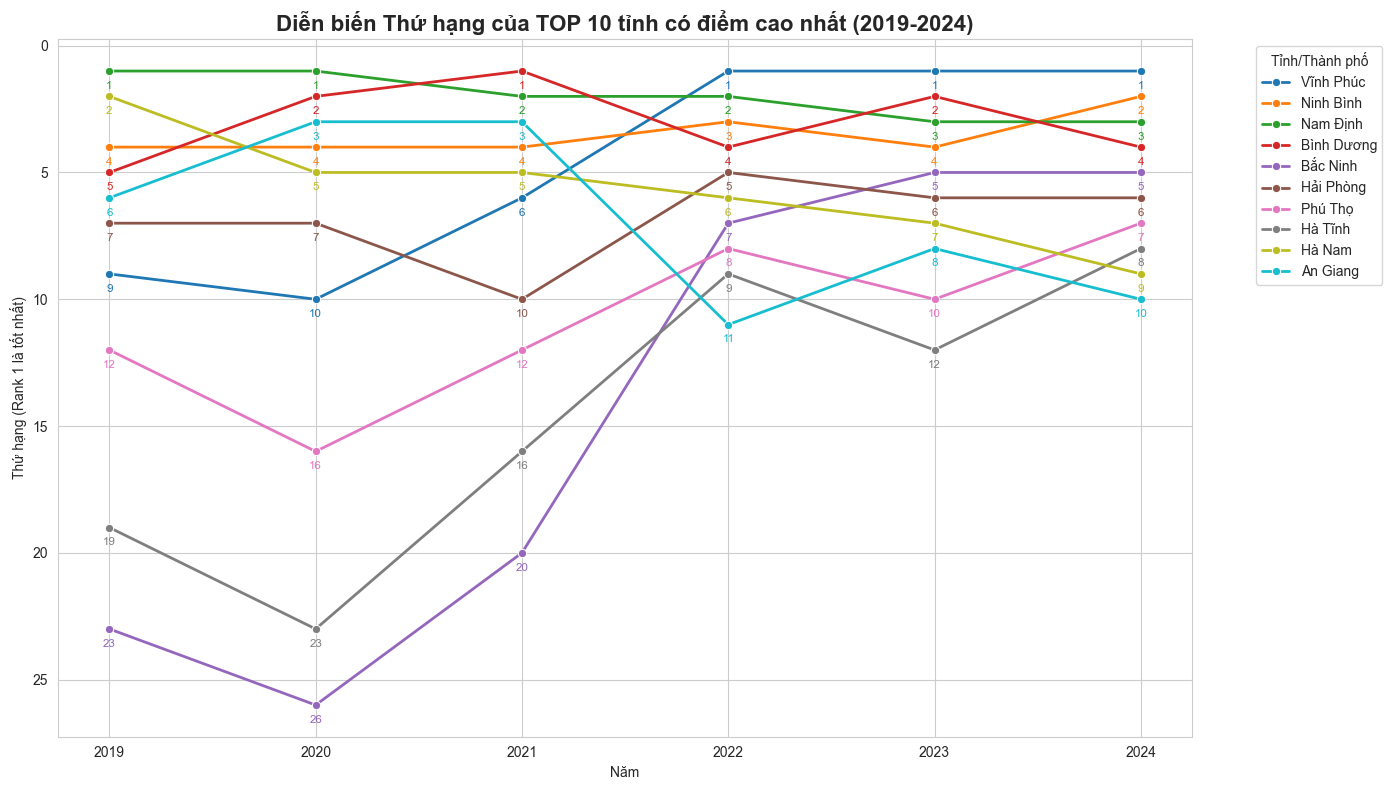

✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.


In [2]:
# Lấy Top 10 tỉnh có điểm cao nhất (Rank thấp nhất)
df_top_best = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=True
)

# Xóa Index thừa và hiển thị
df_top_best = df_top_best.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_best.columns[0] != 'Tỉnh/Thành phố':
    df_top_best = df_top_best.iloc[:, 1:]
    
df_top_best_clean = clean_rank_to_int(df_top_best)
print("--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---")
display(df_top_best_clean)

# Visualization Hành trình Thứ hạng
custom_title_1 = "Diễn biến Thứ hạng của TOP 10 tỉnh có điểm cao nhất (2019-2024)"
file_path_best = os.path.join(charts_dir, 'top10_best_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_best,
    custom_title=custom_title_1,
    file_output_png=file_path_best
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.")

--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---


,Tỉnh/Thành phố,Thứ hạng 2019,Thứ hạng 2020,Thứ hạng 2021,Thứ hạng 2022,Thứ hạng 2023,Thứ hạng 2024
0,Hà Giang,62,62,63,63,63,63
1,Cao Bằng,60,59,60,57,62,62
2,Đắk Lắk,58,58,57,61,61,61
3,Đắk Nông,54,53,59,62,57,60
4,Điện Biên,48,49,56,44,56,59
5,Ninh Thuận,52,54,54,54,53,58
6,Lai Châu,49,57,49,58,52,57
7,Sơn La,63,61,61,55,60,56
8,Quảng Trị,29,40,55,52,46,55
9,Quảng Nam,47,52,47,42,45,54


📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_worst_journey.png


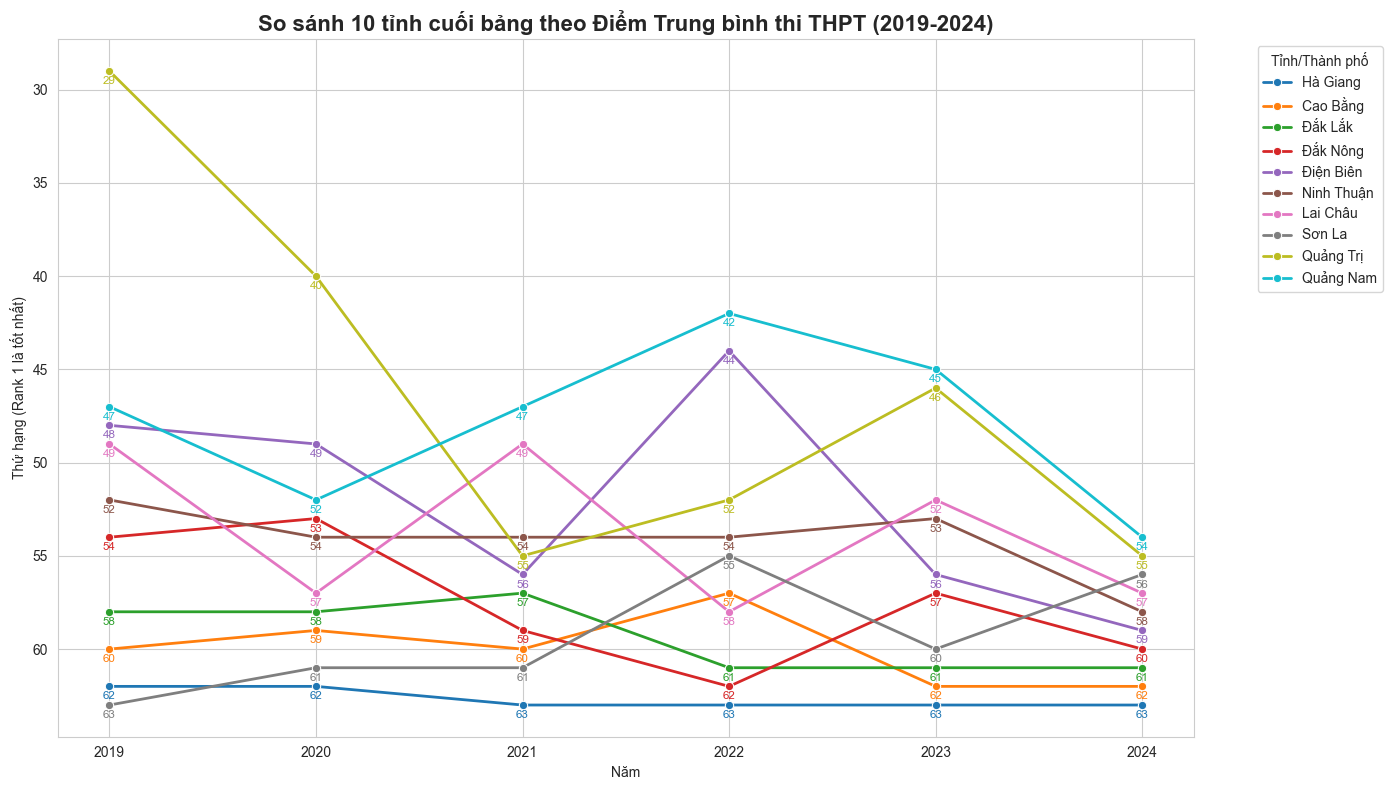

✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.

🎉 Toàn bộ quy trình đã hoàn tất!


In [3]:
# Lấy Top 10 tỉnh có điểm thấp nhất (Rank cao nhất)
df_top_worst = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=False 
)

# Xóa Index thừa và hiển thị
df_top_worst = df_top_worst.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_worst.columns[0] != 'Tỉnh/Thành phố':
    df_top_worst = df_top_worst.iloc[:, 1:]
    
df_top_worst_clean = clean_rank_to_int(df_top_worst)
print("--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---")
display(df_top_worst_clean)

# Visualization Hành trình Thứ hạng
custom_title_2 = "So sánh 10 tỉnh cuối bảng theo Điểm Trung bình thi THPT (2019-2024)"
file_path_worst = os.path.join(charts_dir, 'top10_worst_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_worst,
    custom_title=custom_title_2,
    file_output_png=file_path_worst
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.")

print("\n🎉 Toàn bộ quy trình đã hoàn tất!")